In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import geo_tools, nc_tools, tidetools, viz_tools
import xarray as xr
from IPython.core.display import display, HTML
import scipy.signal as signal
import glob
import matplotlib.cm as cm
import datetime
display(HTML("<style>.container { width:90% !important; }</style>"))

%matplotlib inline

In [2]:
winds_data = xr.open_dataset(
    'https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1')

In [3]:
N = 1
Wn = 1/24
B, A = signal.butter(N,Wn)

In [4]:
def plot_winds(first, days):
    end_index = days * 24
    fig, ax = plt.subplots(figsize = (30, 5))
    times = np.array([first + datetime.timedelta(hours = i) for i in range(end_index)])
    averaged_SI_u_winds = np.array([])
    averaged_SI_v_winds = np.array([])
    averaged_SS_u_winds = np.array([])
    averaged_SS_v_winds = np.array([])
    for n in range(end_index):
        SI_u_winds = winds_data.u_wind.isel(gridY=slice(159,162), 
                                            gridX=slice(119,122)).sel(time=times[n], 
                                                                      method = 'nearest').values
        averaged_SI_u_winds = np.append(averaged_SI_u_winds, np.mean(SI_u_winds))
        SI_v_winds = winds_data.v_wind.isel(gridY=slice(159,162), 
                                            gridX=slice(119,122)).sel(time=times[n], 
                                                                      method = 'nearest').values
        averaged_SI_v_winds = np.append(averaged_SI_v_winds, np.mean(SI_v_winds))
        SS_u_winds = winds_data.u_wind.isel(gridY=slice(182,185), 
                                            gridX=slice(106,109)).sel(time=times[n], 
                                                                      method = 'nearest').values
        averaged_SS_u_winds = np.append(averaged_SS_u_winds, np.mean(SS_u_winds))
        SS_v_winds = winds_data.v_wind.isel(gridY=slice(182,185), 
                                            gridX=slice(106,109)).sel(time=times[n], 
                                                                      method = 'nearest').values
        averaged_SS_v_winds = np.append(averaged_SS_v_winds, np.mean(SS_v_winds))
    rotated_SI_u_winds, rotated_SI_v_winds = viz_tools.rotate_vel(averaged_SI_u_winds, 
                                                                  averaged_SI_v_winds, 
                                                                  origin = 'map' )
    rotated_SS_u_winds, rotated_SS_v_winds = viz_tools.rotate_vel(averaged_SS_u_winds, 
                                                                  averaged_SS_v_winds, 
                                                                  origin = 'map' )
    SIwindfu = signal.filtfilt(B,A, rotated_SI_u_winds)
    SIwindfv = signal.filtfilt(B,A, rotated_SI_v_winds)
    SSwindfu = signal.filtfilt(B,A, rotated_SS_u_winds)
    SSwindfv = signal.filtfilt(B,A, rotated_SS_v_winds)
    ax.set_title('Averaged and Filtered Winds')
    ax.plot(times, SIwindfu, '--', color = 'teal', label = 'South U winds')
    ax.plot(times, SIwindfv, '-', color = 'teal', label = 'South V winds')
    ax.plot(times, SSwindfu, '--', color = 'tomato', label = 'North U winds')
    ax.plot(times, SSwindfv, '-', color = 'tomato', label = 'North V winds')
    ax.grid('on')
    ax.set_ylim(-10,15)
    ax.legend()

1 loop, best of 1: 23.2 s per loop


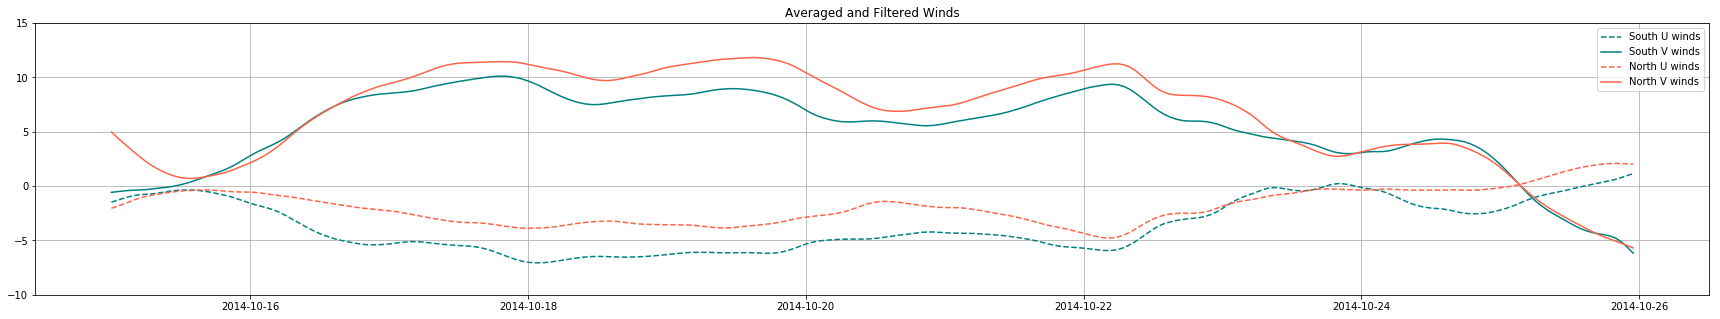

In [6]:
%%timeit -n1 -r1
plot_winds(datetime.datetime(2014, 10, 15), 11)

1 loop, best of 1: 19.8 s per loop


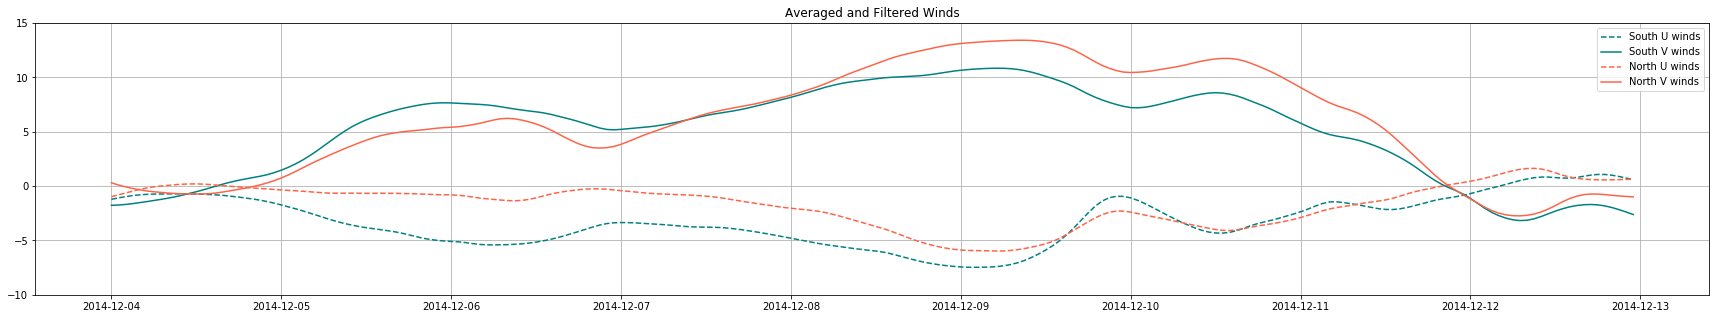

In [10]:
%%timeit -n1 -r1
plot_winds(datetime.datetime(2014, 12, 4), 9)

1 loop, best of 1: 14.8 s per loop


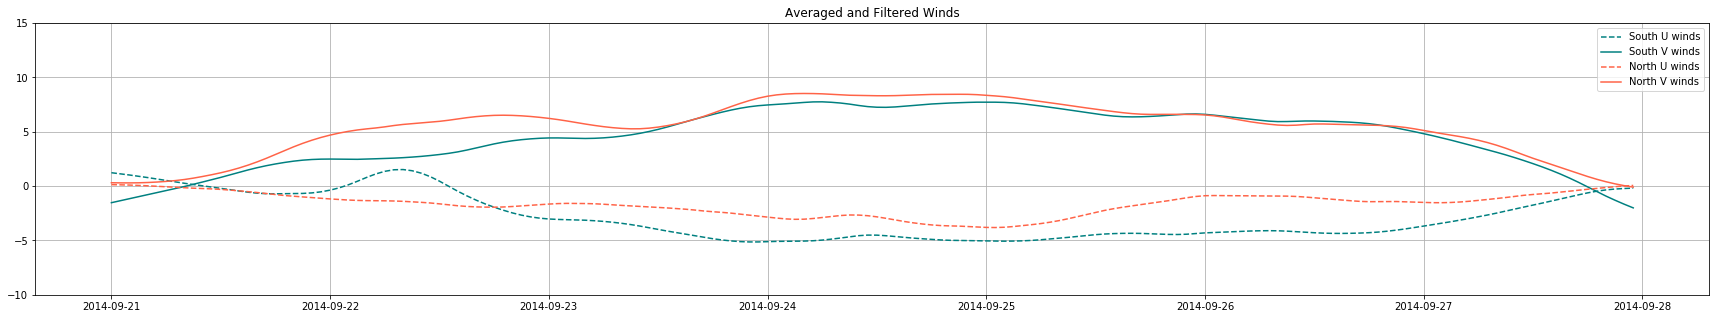

In [60]:
%%timeit -n1 -r1
plot_winds(datetime.datetime(2014, 9, 21), 7)

1 loop, best of 1: 18 s per loop


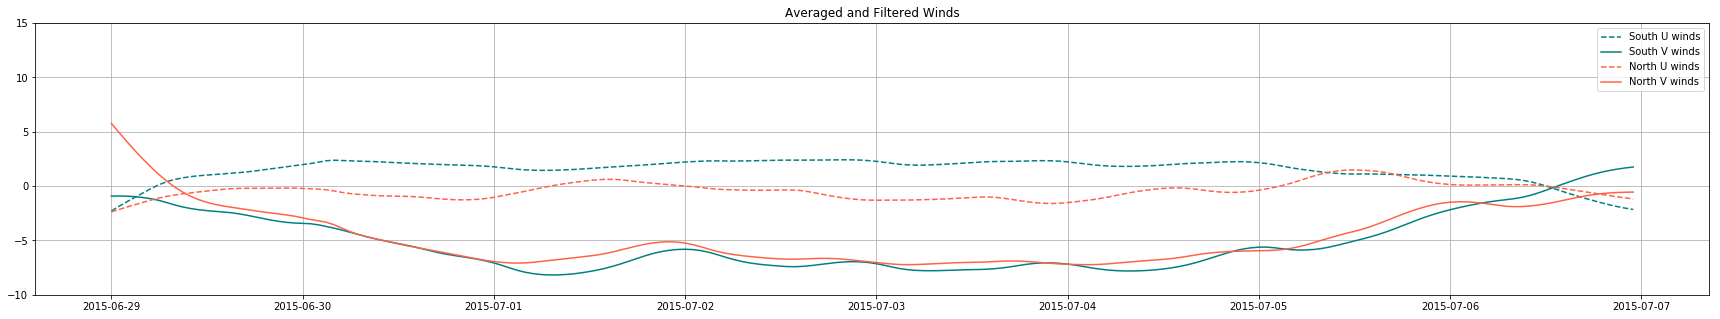

In [54]:
%%timeit -n1 -r1
plot_winds(datetime.datetime(2015, 6, 29), 8)

1 loop, best of 1: 23.4 s per loop


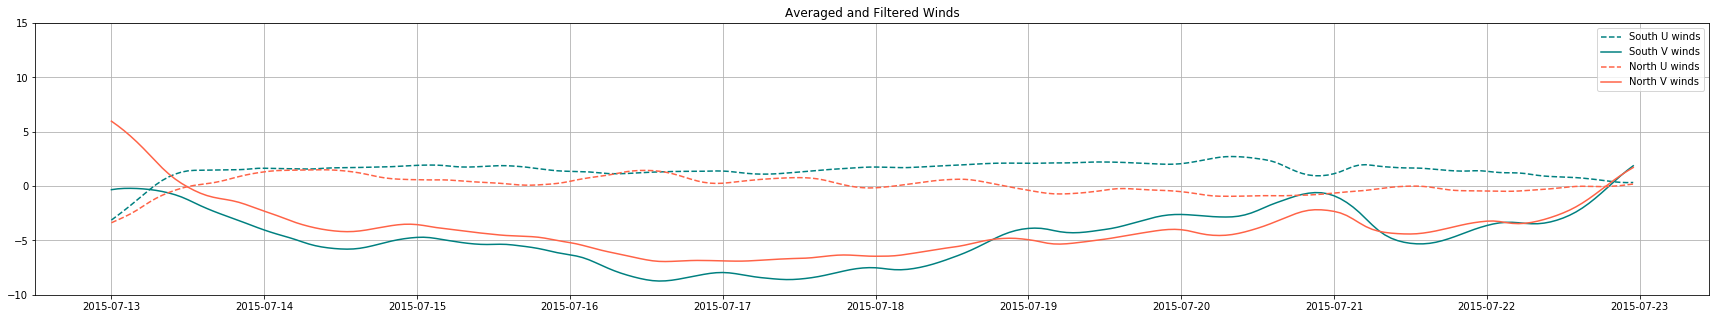

In [43]:
%%timeit -n1 -r1
plot_winds(datetime.datetime(2015, 7, 13), 10)

1 loop, best of 1: 16.8 s per loop


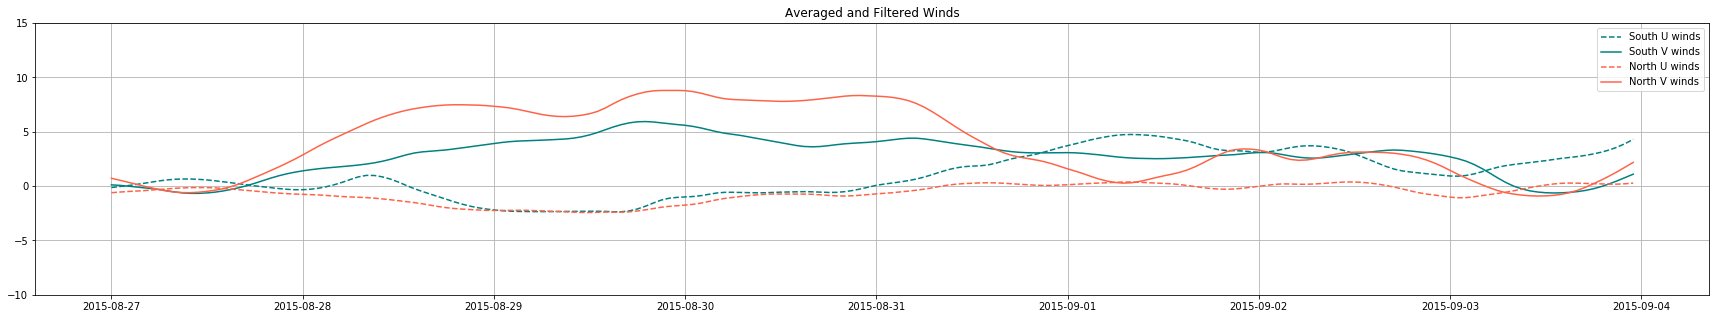

In [12]:
%%timeit -n1 -r1
plot_winds(datetime.datetime(2015, 8, 27), 8)

1 loop, best of 1: 14.5 s per loop


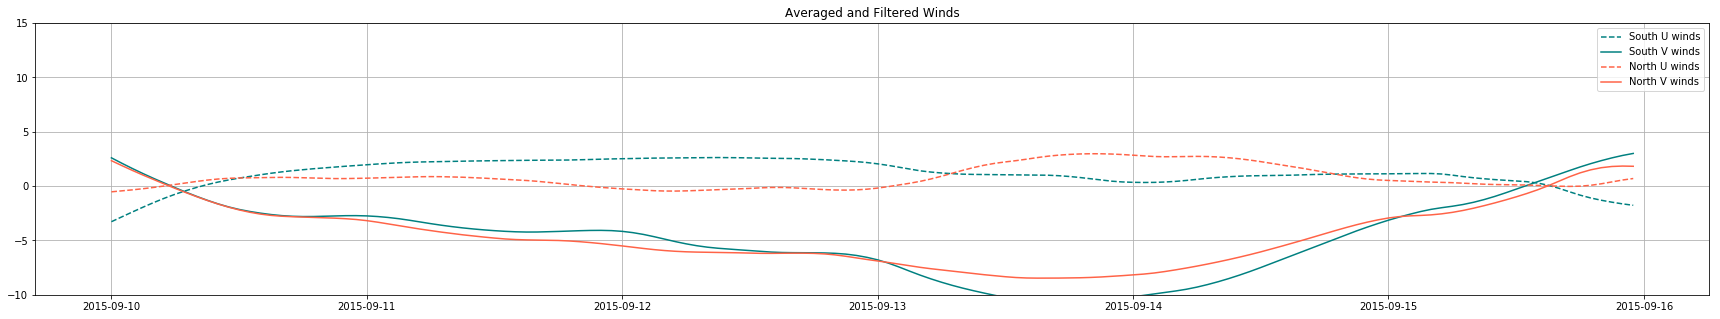

In [63]:
%%timeit -n1 -r1
plot_winds(datetime.datetime(2015, 9, 10), 6)

1 loop, best of 1: 14.3 s per loop


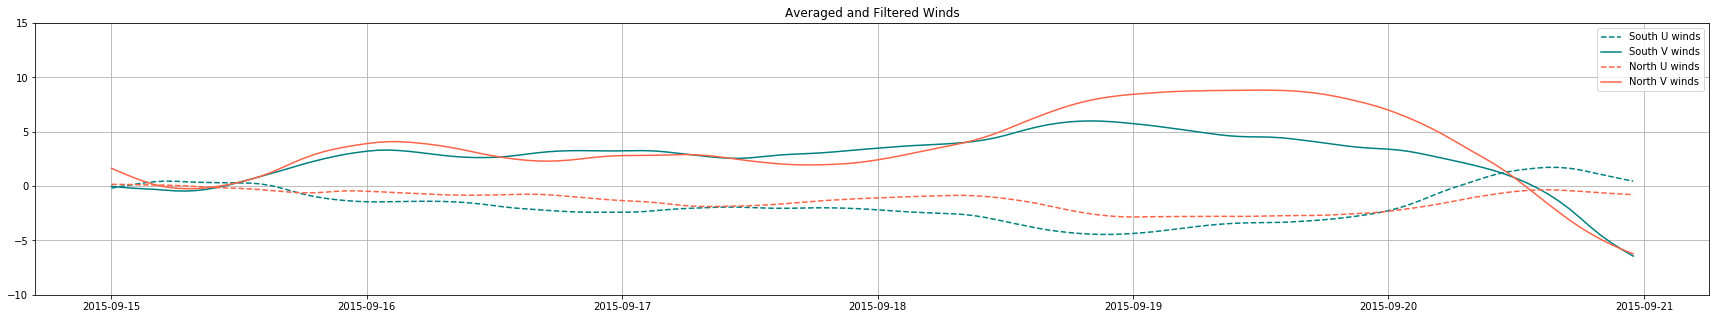

In [65]:
%%timeit -n1 -r1
plot_winds(datetime.datetime(2015, 9, 15), 6)

1 loop, best of 1: 6.31 s per loop


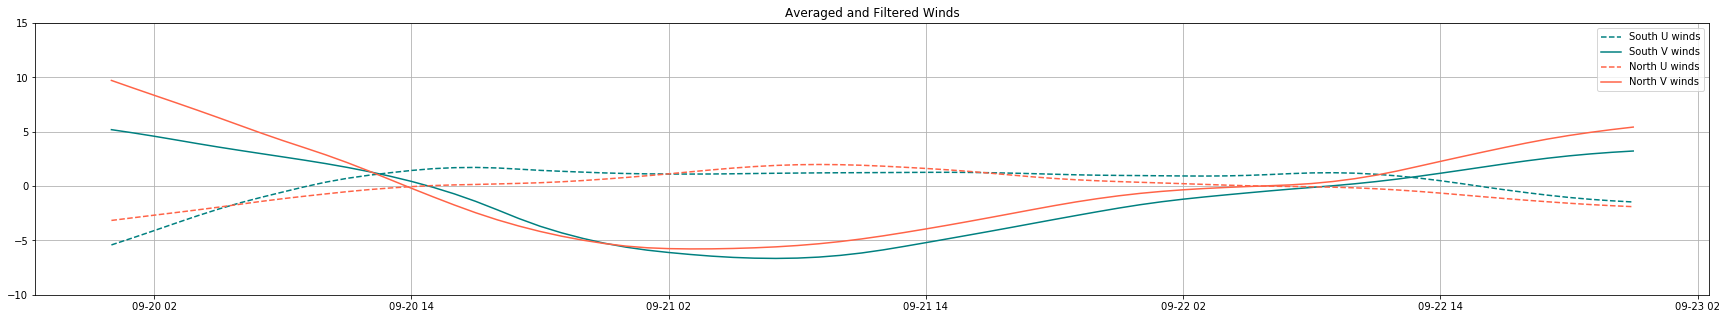

In [17]:
%%timeit -n1 -r1
plot_winds(datetime.datetime(2015, 9, 20), 3)

1 loop, best of 1: 8.38 s per loop


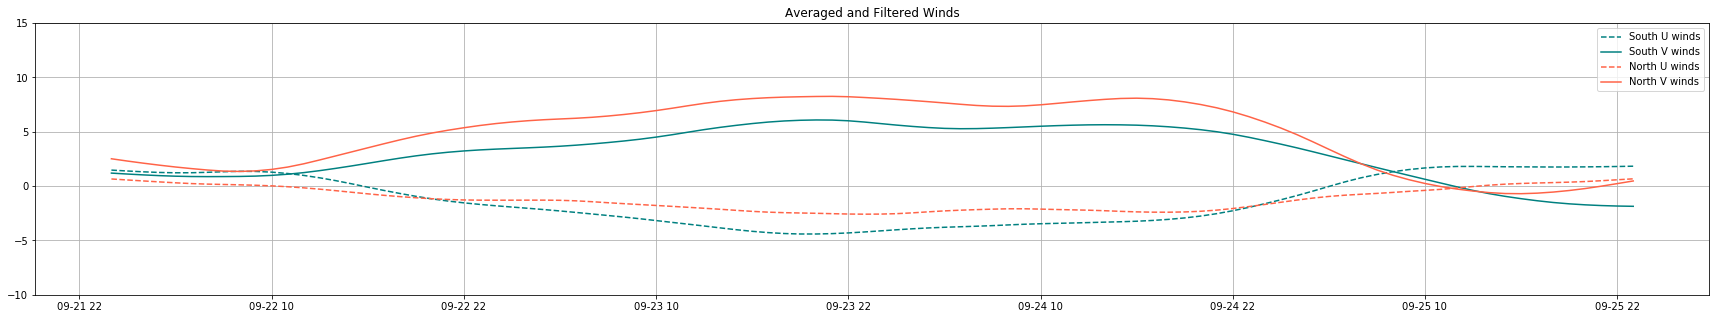

In [18]:
%%timeit -n1 -r1
plot_winds(datetime.datetime(2015, 9, 22), 4)

1 loop, best of 1: 12.5 s per loop


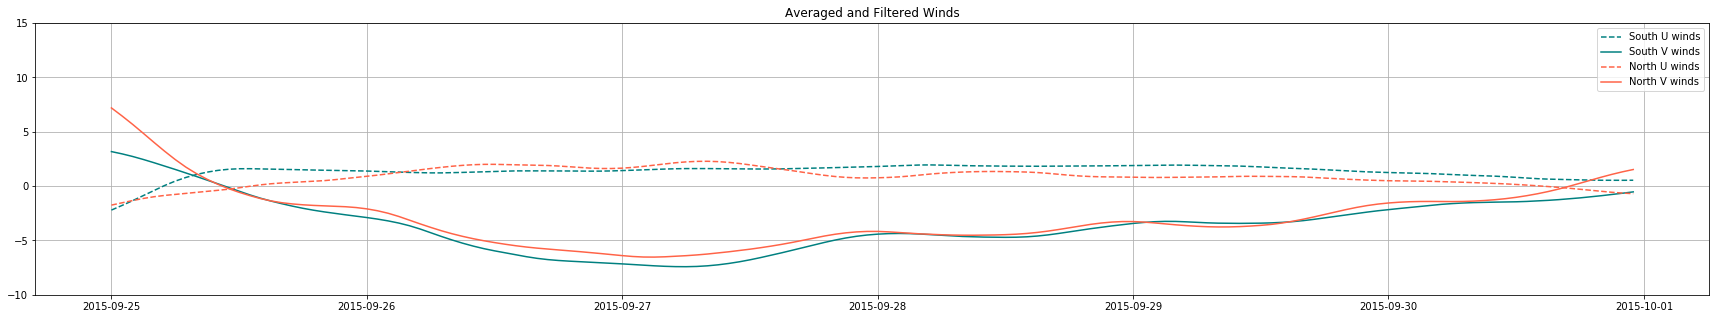

In [23]:
%%timeit -n1 -r1
plot_winds(datetime.datetime(2015, 9, 25), 6)

1 loop, best of 1: 14 s per loop


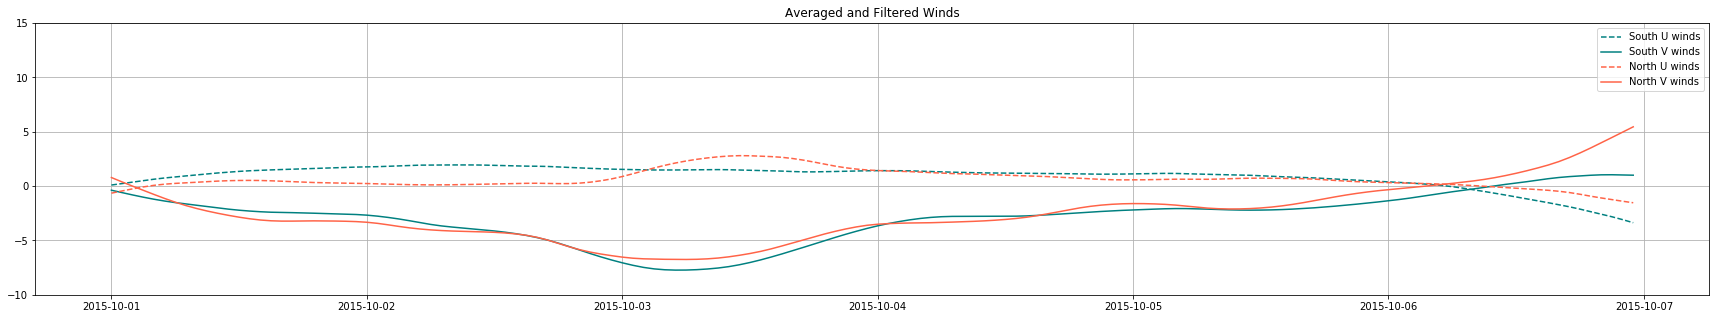

In [25]:
%%timeit -n1 -r1
plot_winds(datetime.datetime(2015, 10, 1), 6)

1 loop, best of 1: 18.2 s per loop


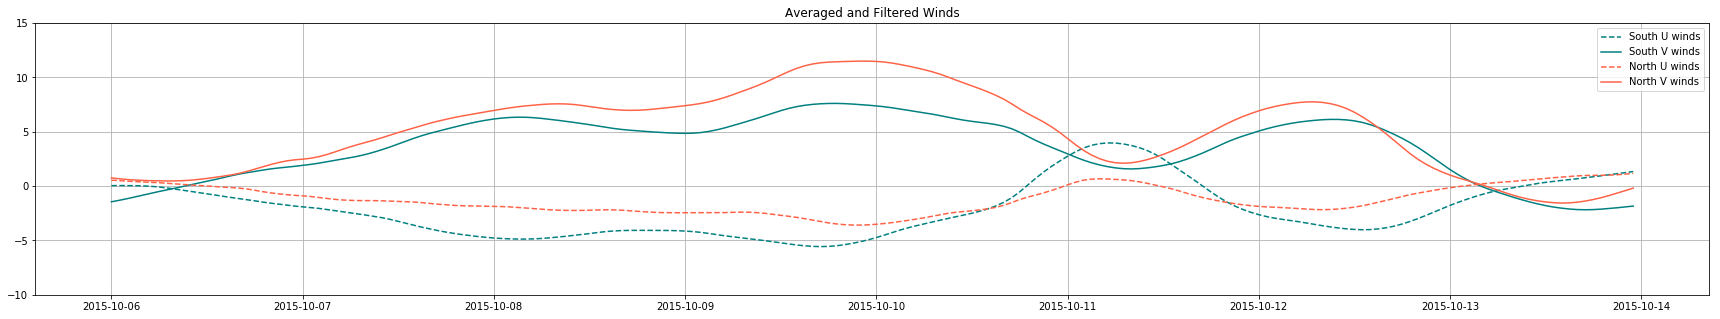

In [22]:
%%timeit -n1 -r1
plot_winds(datetime.datetime(2015, 10, 6), 8)

1 loop, best of 1: 9.66 s per loop


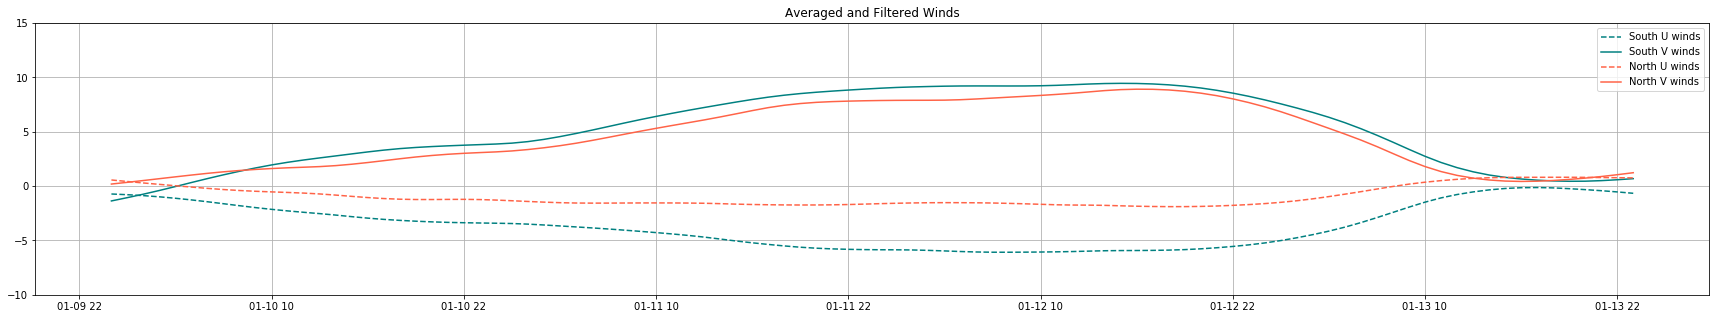

In [28]:
%%timeit -n1 -r1
plot_winds(datetime.datetime(2016, 1, 10), 4)

1 loop, best of 1: 13.1 s per loop


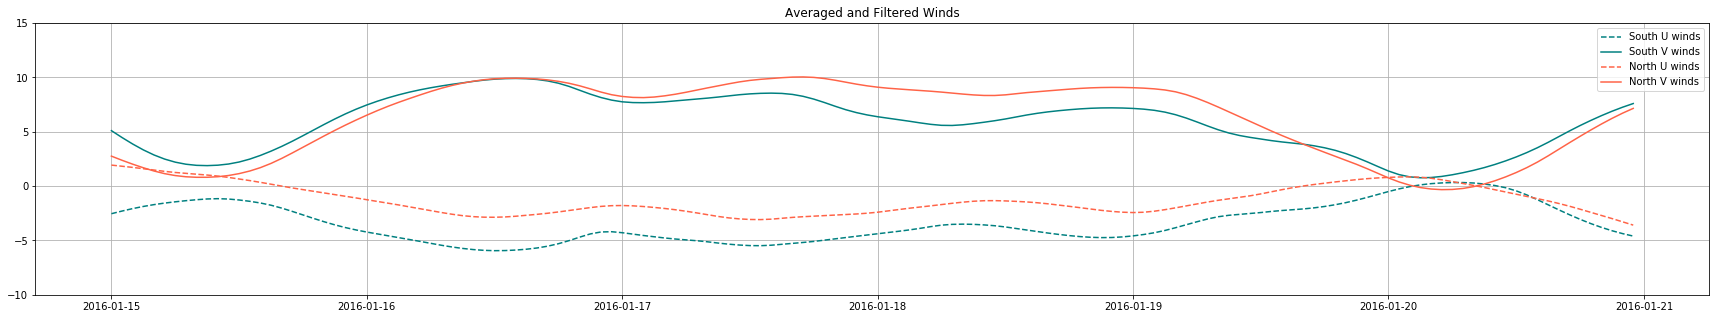

In [30]:
%%timeit -n1 -r1
plot_winds(datetime.datetime(2016, 1, 15), 6)

1 loop, best of 1: 6.63 s per loop


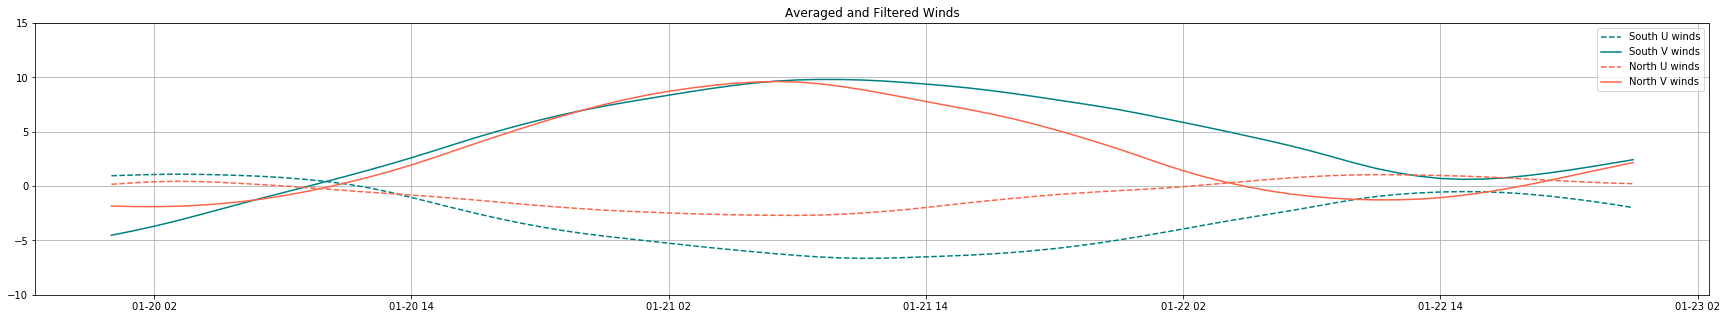

In [31]:
%%timeit -n1 -r1
plot_winds(datetime.datetime(2016, 1, 20), 3)

1 loop, best of 1: 20.3 s per loop


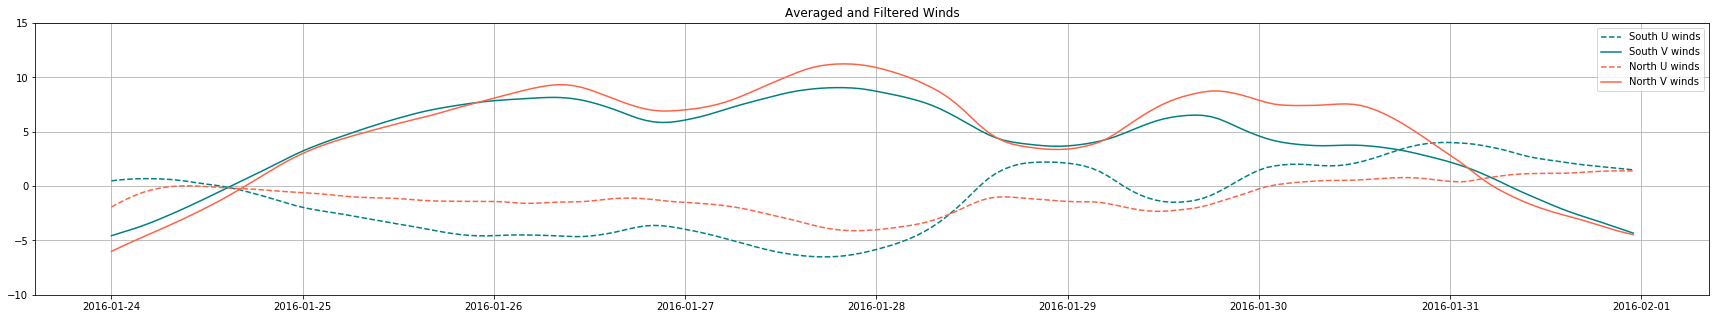

In [32]:
%%timeit -n1 -r1
plot_winds(datetime.datetime(2016, 1, 24), 8)

1 loop, best of 1: 23.2 s per loop


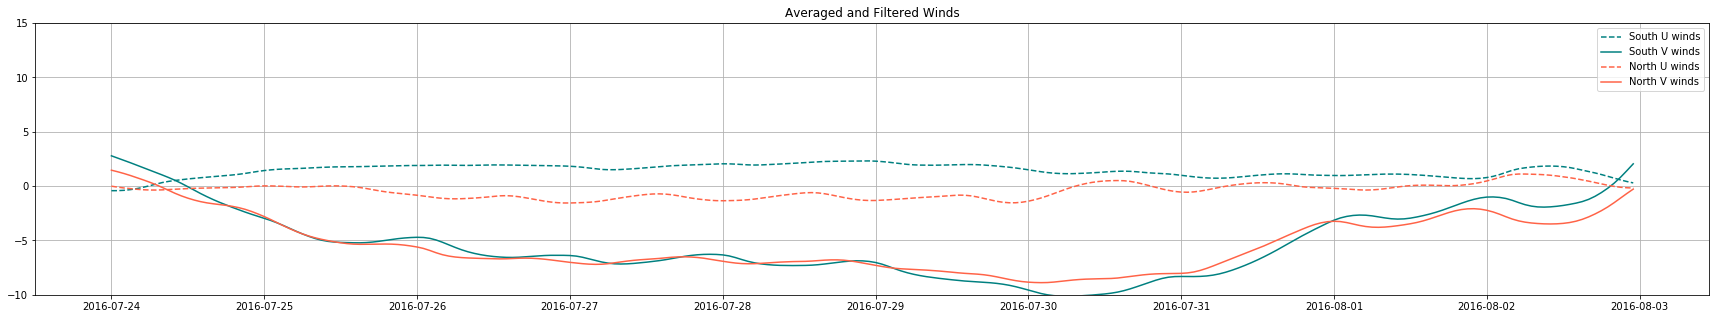

In [42]:
%%timeit -n1 -r1
plot_winds(datetime.datetime(2016, 7, 24), 10)

1 loop, best of 1: 11.6 s per loop


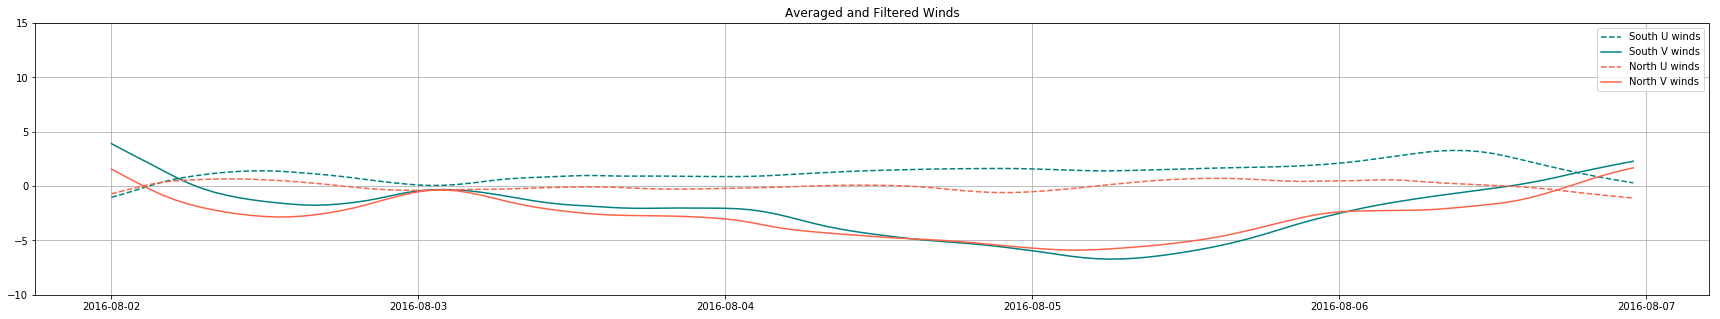

In [37]:
%%timeit -n1 -r1
plot_winds(datetime.datetime(2016, 8, 2), 5)

1 loop, best of 1: 47.9 s per loop


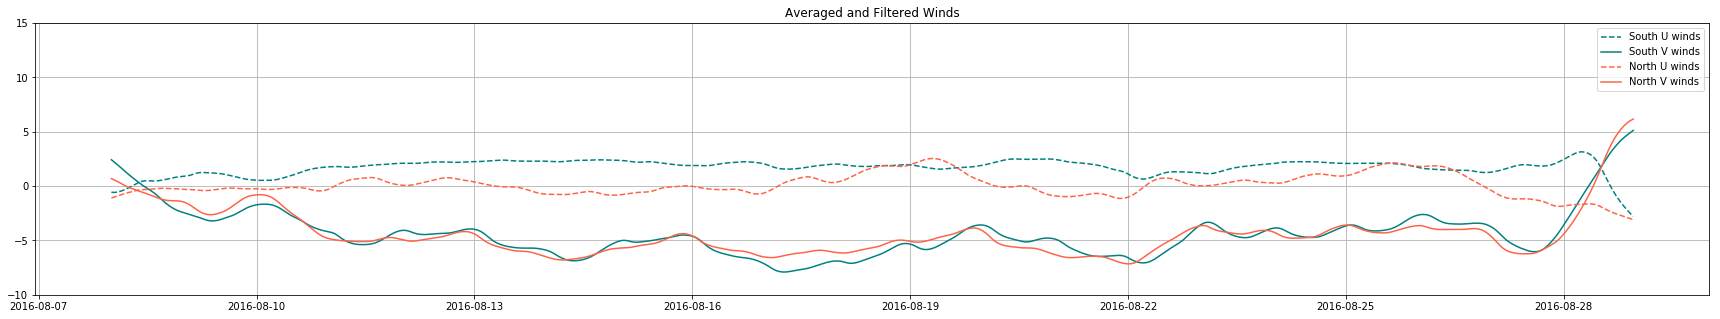

In [38]:
%%timeit -n1 -r1
plot_winds(datetime.datetime(2016, 8, 8), 21)

1 loop, best of 1: 11.1 s per loop


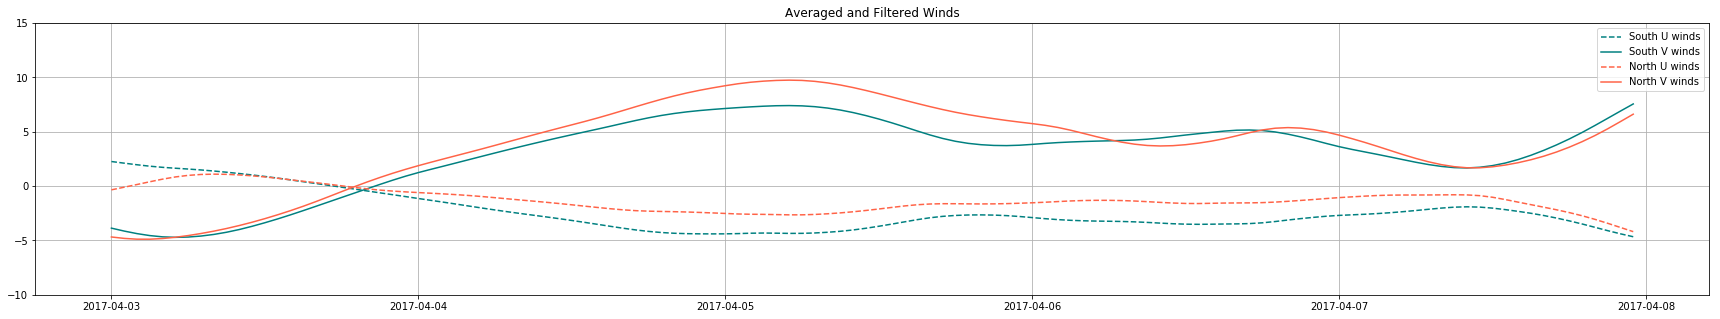

In [36]:
%%timeit -n1 -r1
plot_winds(datetime.datetime(2017, 4, 3), 5)

1 loop, best of 1: 9.2 s per loop


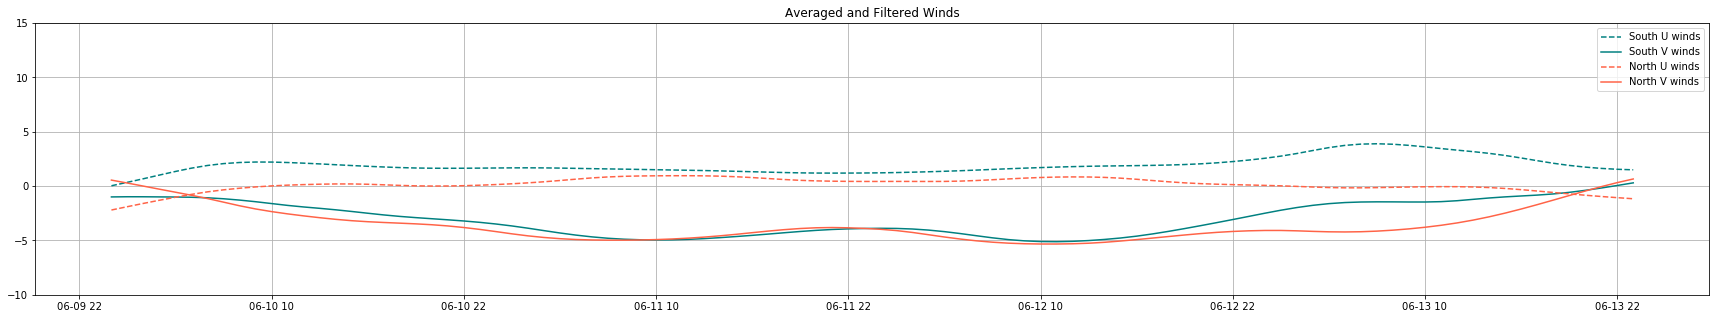

In [55]:
%%timeit -n1 -r1
plot_winds(datetime.datetime(2017, 6, 10), 4)

1 loop, best of 1: 6.63 s per loop


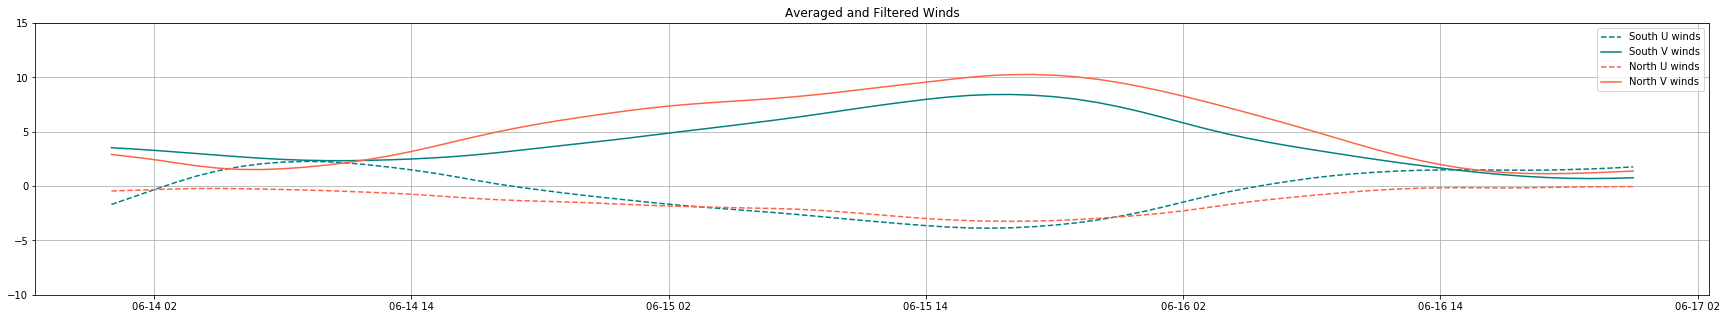

In [50]:
%%timeit -n1 -r1
plot_winds(datetime.datetime(2017, 6, 14), 3)

1 loop, best of 1: 12.8 s per loop


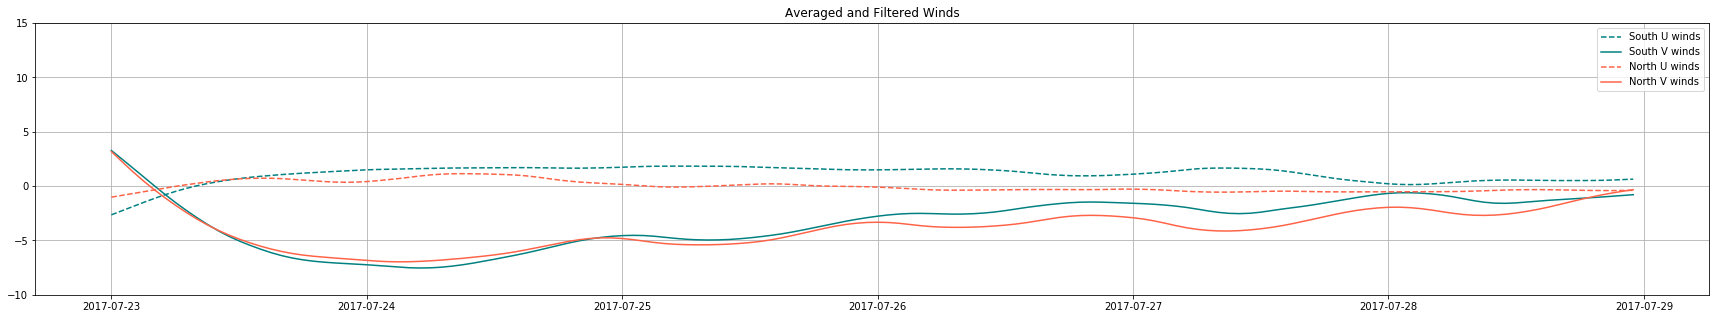

In [53]:
%%timeit -n1 -r1
plot_winds(datetime.datetime(2017, 7, 23), 6)

1 loop, best of 1: 12.1 s per loop


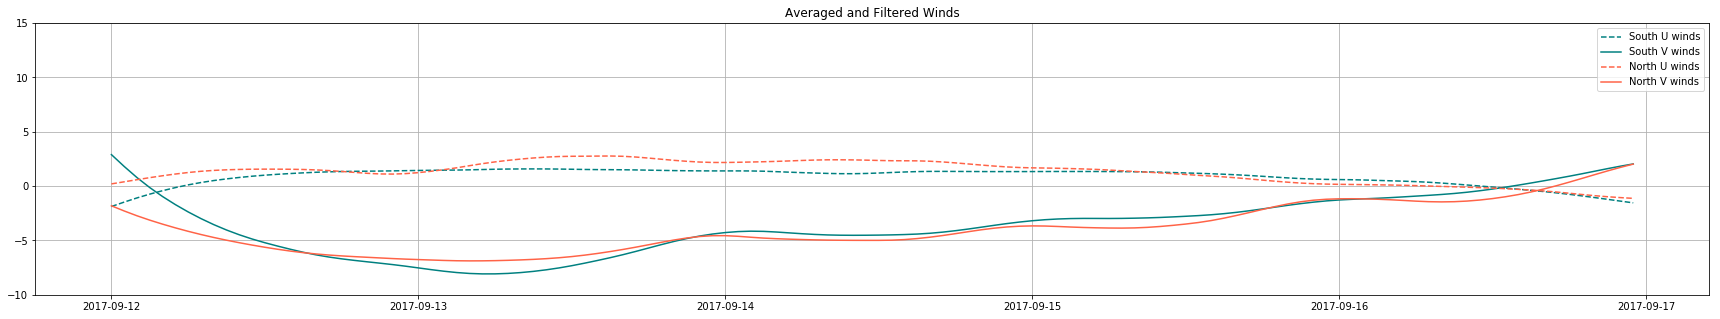

In [62]:
%%timeit -n1 -r1
plot_winds(datetime.datetime(2017, 9, 12), 5)